In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [ ]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gold_data.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [ ]:
#print last 5 rows of dataframe
gold_data.tail()


,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking the number of missing values
gold_data.isnull().sum()


,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
#getting statiscal measures of the data
gold_data.describe()


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<Axes: >

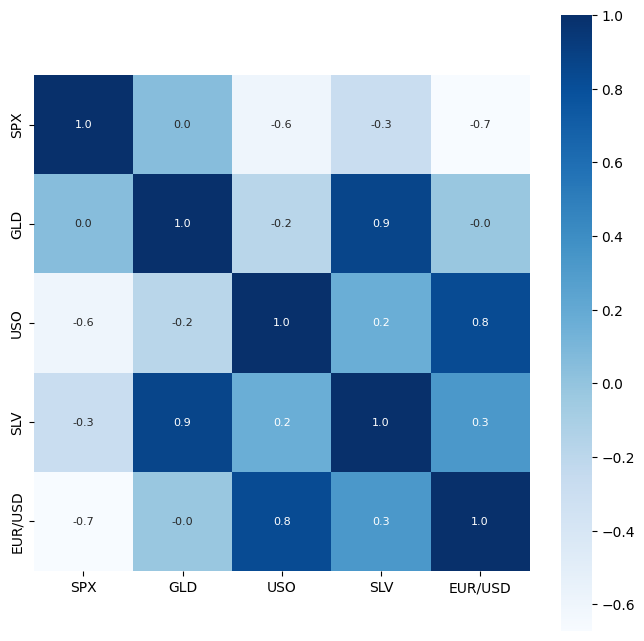

In [ ]:
#we will find correlation between these data
#two types of correlation positive and negative
#cbar=color baar, fmt=points decimals
correlation = gold_data.drop(['Date'], axis=1).corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
#correlation values understanding
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-12-ac17cc3f28a8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

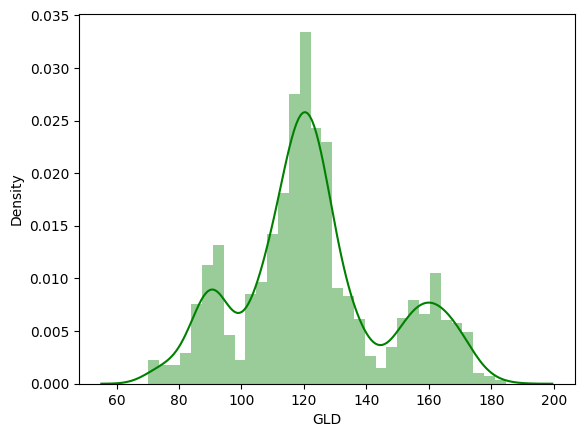

In [ ]:
#check the distribution of the gold price
sns.distplot(gold_data['GLD'],color='green')

In [ ]:
#so till now, we have learnt to visualise data, now let's start the work of machine learning as we have to now predict the price of gold

In [ ]:
#splitting the features and target (gold price)
X=gold_data.drop(['Date','GLD'],axis=1) #axis=1 for columns and 0 for rows
Y=gold_data['GLD']
print(X)
print(Y)


              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
#splitting into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)
#model training usinf random forest regressor
regressor= RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, Y_train)



RandomForestRegressor()

In [ ]:
#mode_evaluate
#prediction of test data

test_data_prediction=regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

#compare values with exact values

#R squared errors

error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R Squared error : ',error_score)

[168.57079939  82.01089977 115.80779987 127.67690102 120.90590151
 154.784698   150.45259853 126.21030014 117.44849903 126.08600069
 116.702401   171.67670059 141.56819841 168.06579788 115.03840008
 117.38160044 138.14010348 170.19990099 159.22660257 161.40920007
 155.07410012 125.52719996 175.52360014 156.86530353 125.12560055
  93.92619956  77.22620045 120.44169974 119.10409947 167.4626999
  88.14170084 125.05280024  91.19000103 117.59660005 121.10979919
 135.7325005  115.61540127 115.84030079 147.92119936 107.15350085
 104.34480237  87.2255981  126.55300026 118.04300006 154.20619904
 119.66319989 108.48059984 108.00109846  93.19770057 127.0044986
  75.73600025 113.76099947 121.40859998 111.2302992  118.85879882
 120.78779963 158.9587009  167.63780135 146.92599652  85.60139856
  94.44660034  86.82329855  90.64110008 119.01410056 126.4286004
 127.63250025 169.6277995  122.23269953 117.51539893  98.49609994
 168.27820194 142.90509894 131.93090239 121.27280229 121.36539957
 119.56790067

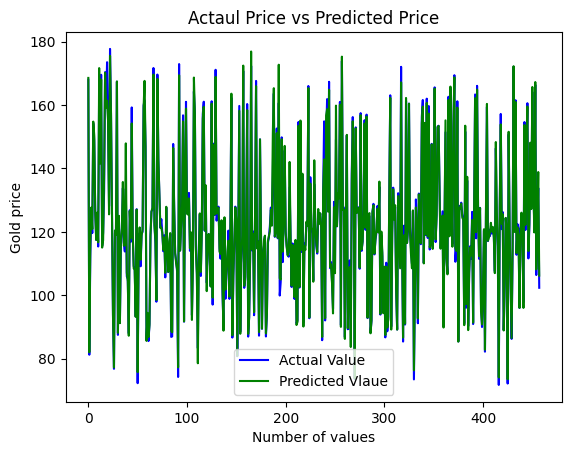

In [ ]:
#we can use deep learning models too

#we can use it by using graphs

Y_test=list(Y_test)
plt.plot(Y_test, color='blue', label="Actual Value")
plt.plot(test_data_prediction, color='green', label="Predicted Vlaue")
plt.title('Actaul Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()


R² value close to 1 (0.989) suggests that the Random Forest Regressor model explains nearly all the variance in the gold prices based on the input features.